## classification algos

#Logistics Regression


In [ ]:
import pandas as pd

df_cleaned = pd.read_csv('/content/drive/MyDrive/ravi/cleaned_movie_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame with the data

# Select numerical features for correlation matrix
features_for_corr = df_cleaned.drop(columns=[
    'movie_title', 'production_date', 'genres', 'director_name', 'director_professions',
    'director_birthyear', 'director_deathyear', 'blockbuster'
])

# Compute the correlation matrix
corr_matrix = features_for_corr.corr()

# Display the correlation matrix
print(corr_matrix)


                     runtime_minutes  movie_averagerating  movie_numerofvotes  \
runtime_minutes             1.000000             0.415535            0.319651   
movie_averagerating         0.415535             1.000000            0.482509   
movie_numerofvotes          0.319651             0.482509            1.000000   
approval_index              0.419859             0.861117            0.708904   
production budget $         0.277264             0.071382            0.415537   
domestic gross $            0.238524             0.246177            0.600020   
worldwide gross $           0.249802             0.223733            0.584796   
production_year            -0.119637            -0.148382            0.056689   
profit $                    0.220330             0.244977            0.578680   
ROI                        -0.030580             0.084380            0.080905   
composite_score             0.169827             0.243698            0.520769   

                     approv

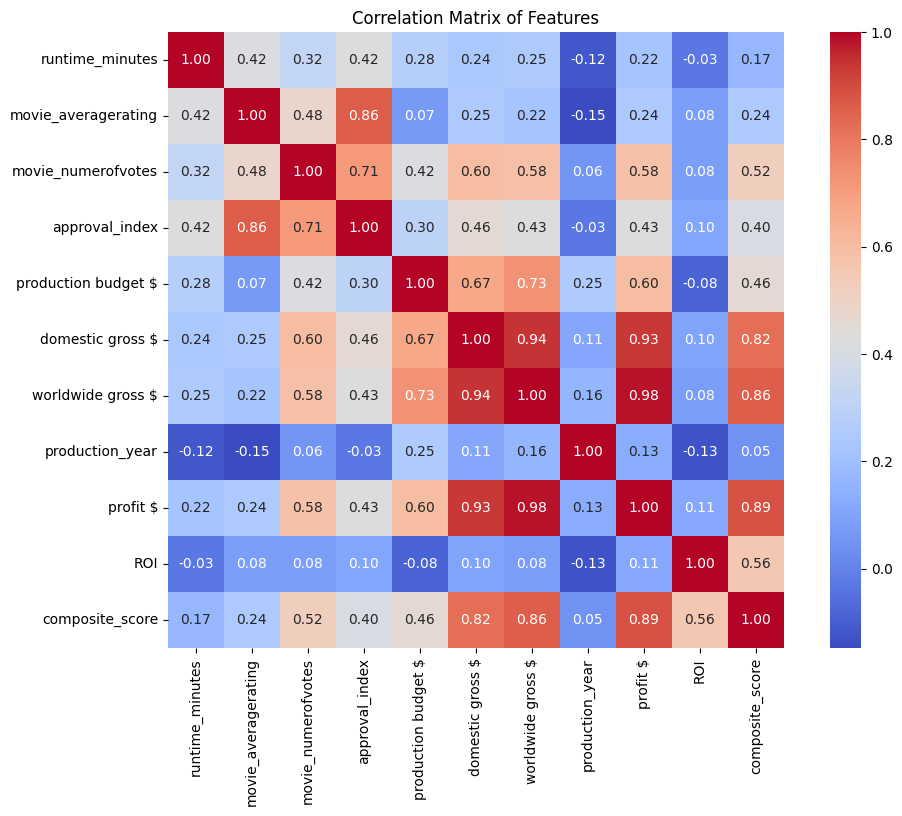

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Combine gross features into a total gross feature
df_cleaned['total_gross'] = df_cleaned['domestic gross $'] + df_cleaned['worldwide gross $']

# Create profit margin feature
df_cleaned['profit_margin'] = df_cleaned['profit $'] / df_cleaned['production budget $']

# Create a weighted approval score
df_cleaned['weighted_approval'] = df_cleaned['approval_index'] * df_cleaned['movie_numerofvotes']

# Drop redundant features
df_cleaned.drop(columns=['domestic gross $', 'worldwide gross $', 'profit $'], inplace=True)


In [ ]:
df_cleaned.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthyear,director_deathyear,movie_averagerating,movie_numerofvotes,approval_index,production budget $,production_year,ROI,composite_score,blockbuster,total_gross,profit_margin,weighted_approval
0,10 Cloverfield Lane,04-01-2016,"Drama,Horror,Mystery",103,Dan Trachtenberg,"music_department,director,writer",1960.0,2023.0,7.2,333495,6.605087,15000000,2016,1.447274e-02,0.087310,False,180369421,4.855805e-09,2.202763e+06
1,10 Days in a Madhouse,11-11-2015,Drama,111,Timothy Hines,"visual_effects,director,writer",1960.0,2023.0,5.8,2797,3.254874,12000000,2015,7.811924e-07,0.035203,False,29232,2.933481e-09,9.103882e+03
2,10 Things I Hate About You,31-03-1999,"Comedy,Drama,Romance",97,Gil Junger,"producer,director,miscellaneous",1954.0,2023.0,7.3,349513,6.723852,13000000,1999,9.316103e-03,0.065753,False,98591916,4.341337e-09,2.350074e+06
3,102 Dalmatians,22-11-2000,"Adventure,Comedy,Family",100,Kevin Lima,"animation_department,director,producer",1962.0,2023.0,4.8,38163,3.593880,85000000,2000,1.577385e-03,0.034608,False,133883118,3.885955e-10,1.371533e+05
4,10th & Wolf,18-08-2006,"Crime,Drama,Thriller",107,Bobby Moresco,"producer,writer,director",1951.0,2023.0,6.3,6641,3.947646,8000000,2006,3.437473e-05,0.036712,False,198484,4.584747e-09,2.621632e+04


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming df_cleaned is your DataFrame with the data

# Select relevant features and the target variable
X = df_cleaned.drop(columns=['movie_title', 'production_date', 'genres', 'director_name', 'director_professions',
                             'director_birthyear', 'director_deathyear', 'blockbuster'])
y = df_cleaned['blockbuster'].astype(int)  # Convert True/False to 1/0

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (3392, 11)
Test features shape: (849, 11)
Training target shape: (3392,)
Test target shape: (849,)


In [ ]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9540636042402827
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       671
           1       0.94      0.84      0.88       178

    accuracy                           0.95       849
   macro avg       0.95      0.91      0.93       849
weighted avg       0.95      0.95      0.95       849

Confusion Matrix:
 [[661  10]
 [ 29 149]]


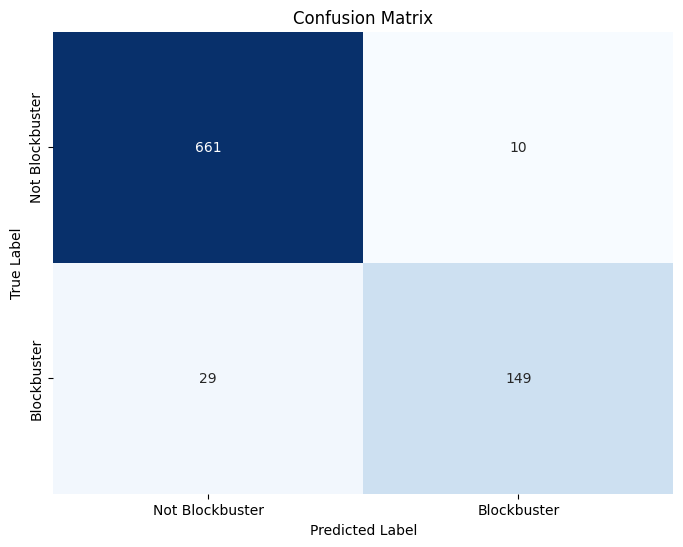

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Blockbuster', 'Blockbuster'],
            yticklabels=['Not Blockbuster', 'Blockbuster'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores for the positive class (blockbuster = 1)
y_prob = logreg_model.predict_proba(X_test)[:, 1]


In [ ]:
# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


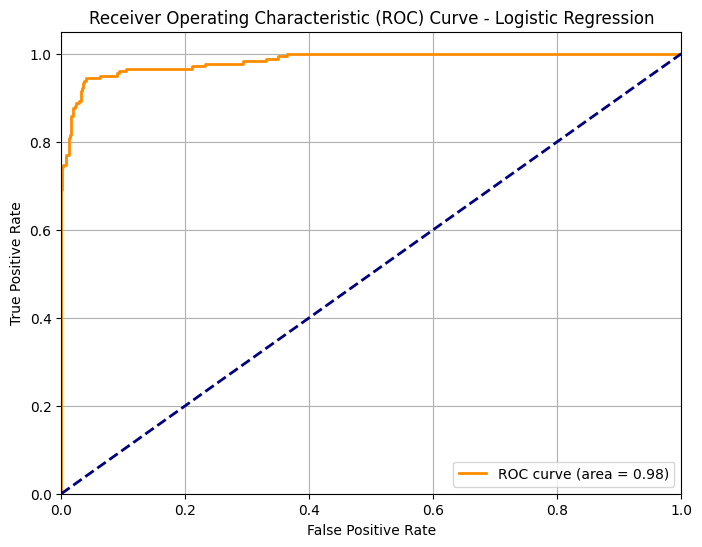

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


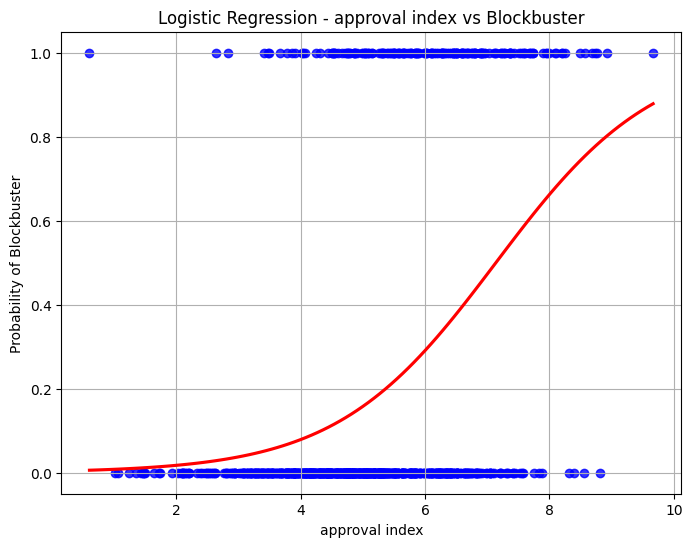

In [ ]:
# Plot logistic regression curve for 'movie_numerofvotes' vs 'blockbuster'
x = X_test['approval_index']
y = y_test

plt.figure(figsize=(8, 6))
sns.regplot(x=x, y=y, data=df_cleaned, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Logistic Regression - approval index vs Blockbuster')
plt.xlabel('approval index')
plt.ylabel('Probability of Blockbuster')
plt.grid(True)
plt.show()

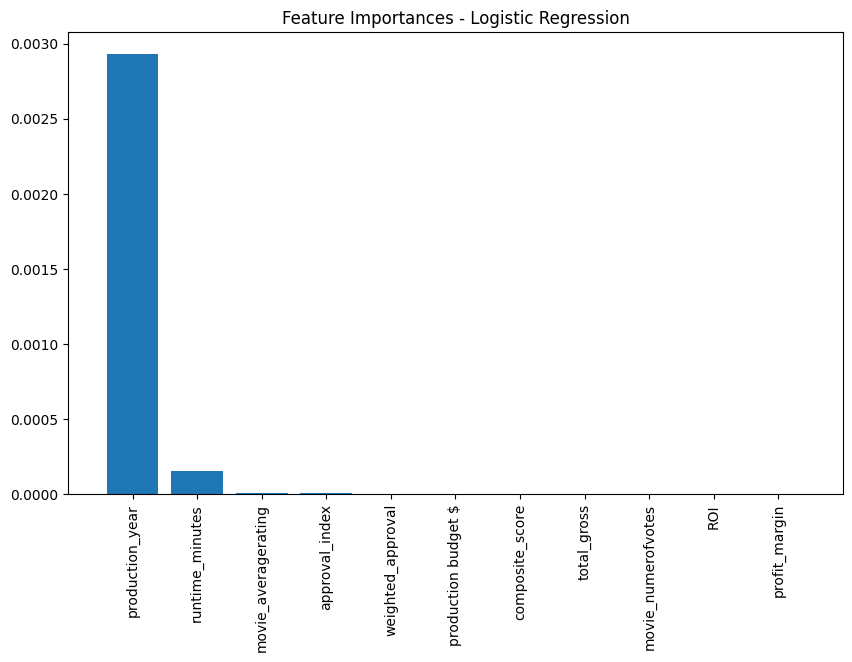

In [ ]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt

# For Logistic Regression, feature importance is based on the absolute value of the coefficients
importances = np.abs(logreg_model.coef_[0])  # Get the coefficients from the logistic regression model
indices = np.argsort(importances)[::-1]  # Sort features by importance in descending order
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Logistic Regression")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


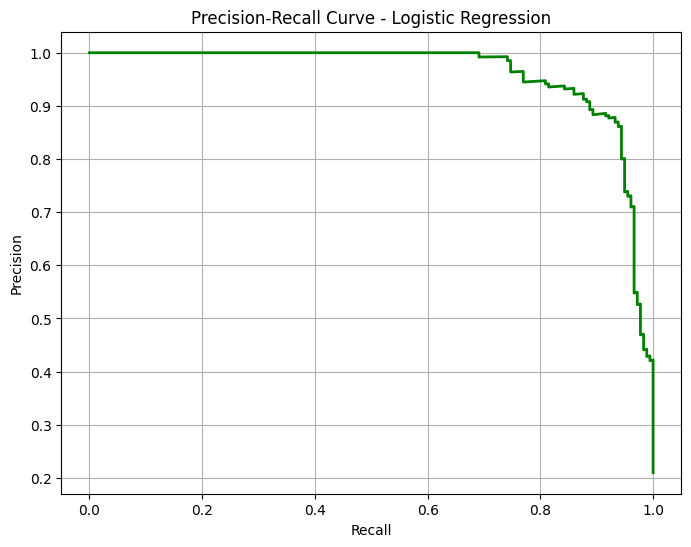

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probability scores for the positive class (blockbuster = 1) from the logistic regression model
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_prob_logreg)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, lw=2, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.grid(True)
plt.show()


## Decision Tree Classifier

Decision Tree Accuracy: 0.9988221436984688
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       671
           1       1.00      0.99      1.00       178

    accuracy                           1.00       849
   macro avg       1.00      1.00      1.00       849
weighted avg       1.00      1.00      1.00       849

Confusion Matrix:
 [[671   0]
 [  1 177]]


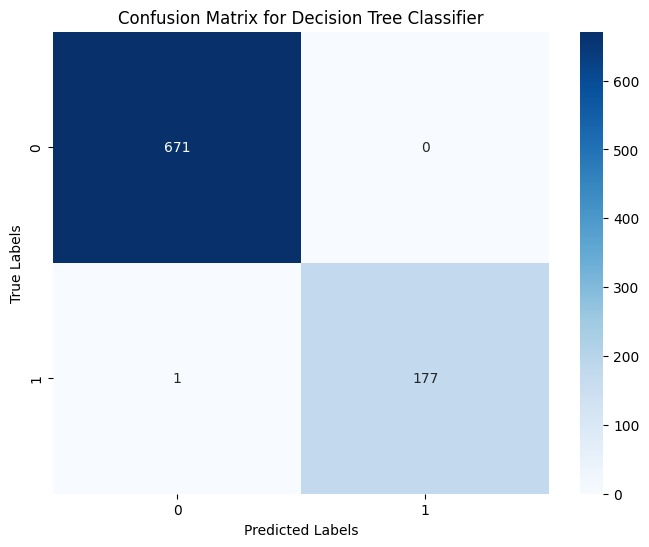

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


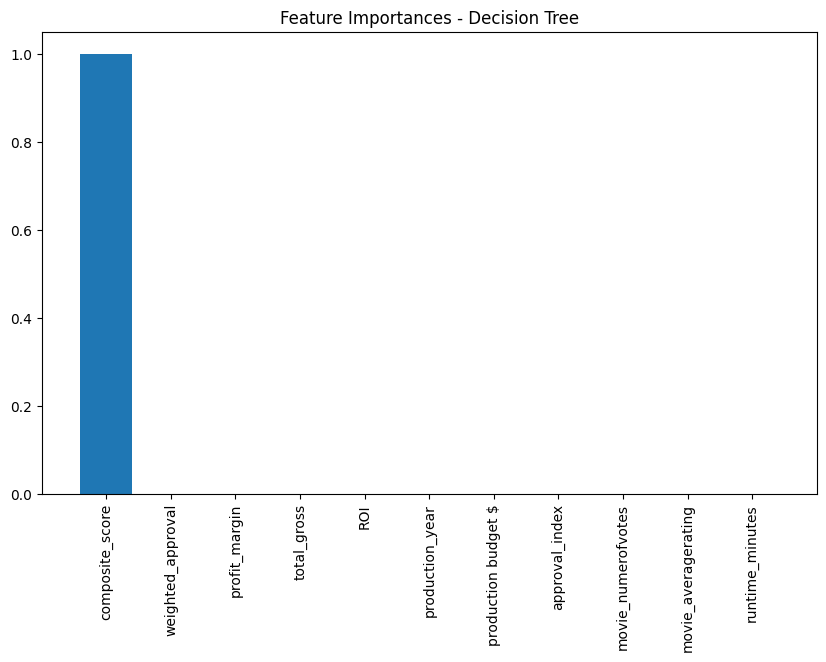

In [ ]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt

# Feature importance from the Decision Tree model
importances = dt_model.feature_importances_  # Get the feature importances from the decision tree model
indices = np.argsort(importances)[::-1]  # Sort features by importance in descending order
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


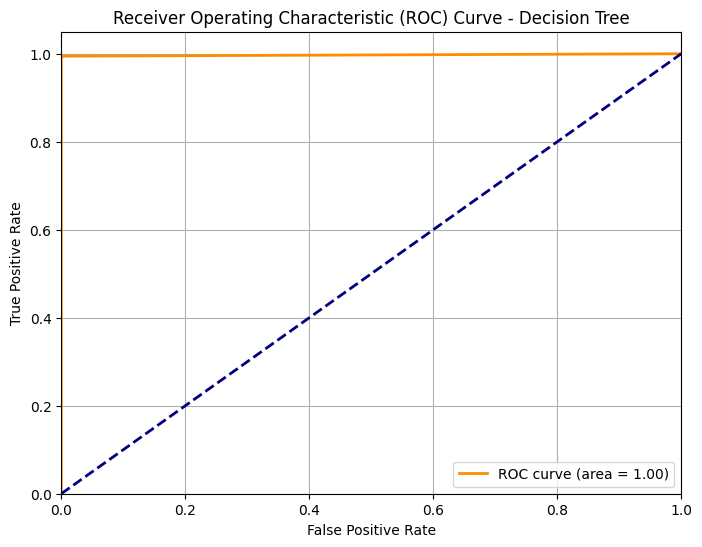

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores for the positive class (blockbuster = 1)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area (AUC)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


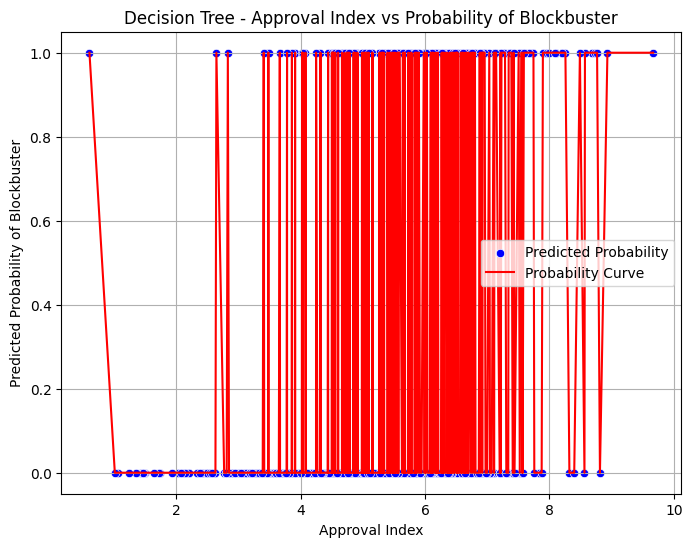

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted probabilities for the positive class (blockbuster = 1) from the decision tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Plot decision tree probability curve for 'approval_index' vs 'blockbuster'
x = X_test['approval_index']
y = y_prob_dt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Predicted Probability')
sns.lineplot(x=x, y=y, color='red', label='Probability Curve')
plt.title('Decision Tree - Approval Index vs Probability of Blockbuster')
plt.xlabel('Approval Index')
plt.ylabel('Predicted Probability of Blockbuster')
plt.grid(True)
plt.legend()
plt.show()


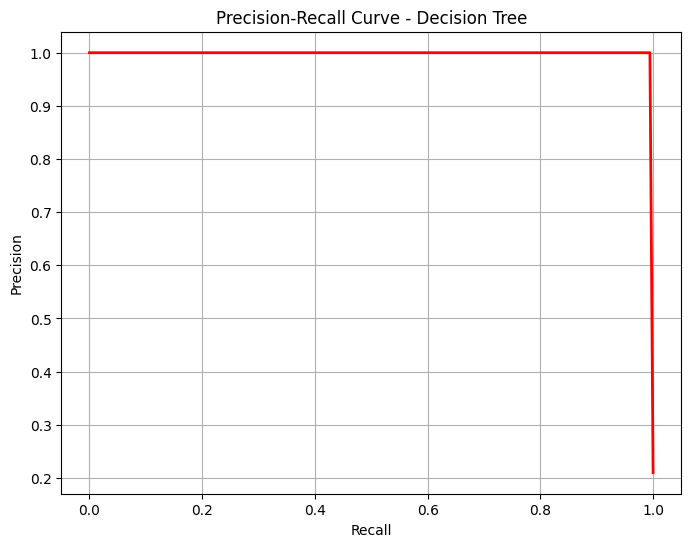

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probability scores for the positive class (blockbuster = 1) from the decision tree model
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_prob_dt)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, lw=2, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.grid(True)
plt.show()


## Random forest

Random Forest Accuracy: 0.9988221436984688
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       671
           1       1.00      0.99      1.00       178

    accuracy                           1.00       849
   macro avg       1.00      1.00      1.00       849
weighted avg       1.00      1.00      1.00       849

Confusion Matrix:
 [[671   0]
 [  1 177]]


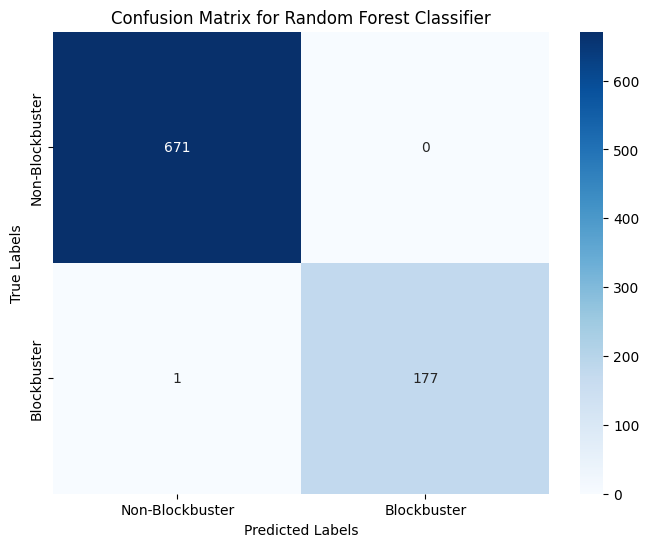

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your DataFrame with the data

# Select relevant features and the target variable
X = df_cleaned.drop(columns=['movie_title', 'production_date', 'genres', 'director_name', 'director_professions',
                             'director_birthyear', 'director_deathyear', 'blockbuster'])
y = df_cleaned['blockbuster'].astype(int)  # Convert True/False to 1/0

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-Blockbuster', 'Blockbuster'], yticklabels=['Non-Blockbuster', 'Blockbuster'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


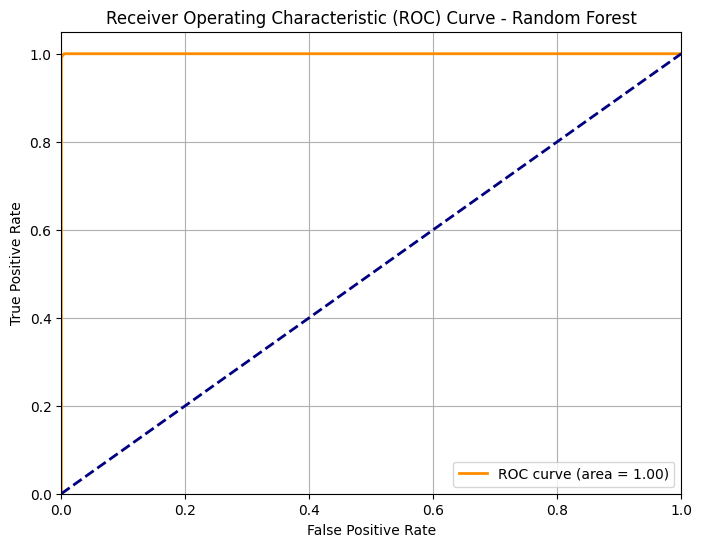

In [ ]:
# Get the probability scores for the positive class (blockbuster = 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


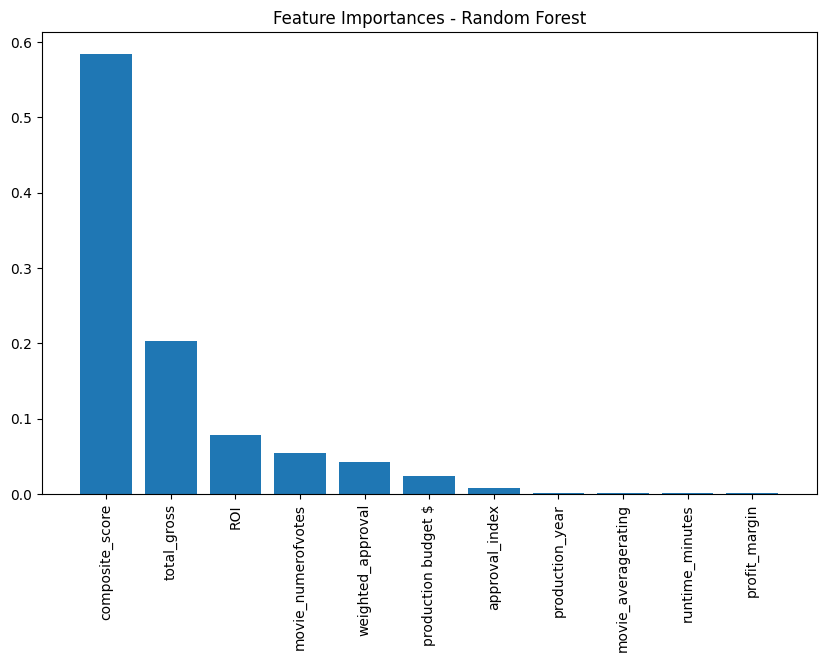

In [ ]:
import numpy as np  # Import numpy for numerical operations

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance in descending order
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


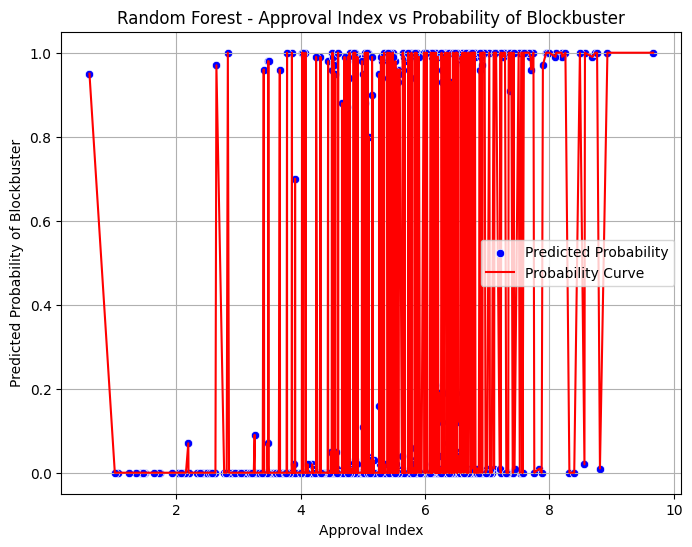

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted probabilities for the positive class (blockbuster = 1) from the random forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Plot random forest probability curve for 'approval_index' vs 'blockbuster'
x = X_test['approval_index']
y = y_prob_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Predicted Probability')
sns.lineplot(x=x, y=y, color='red', label='Probability Curve')
plt.title('Random Forest - Approval Index vs Probability of Blockbuster')
plt.xlabel('Approval Index')
plt.ylabel('Predicted Probability of Blockbuster')
plt.grid(True)
plt.legend()
plt.show()


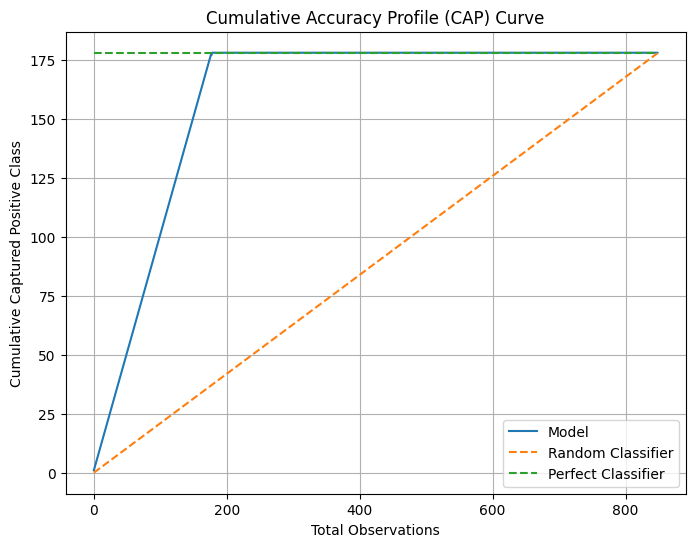

In [ ]:
#Cumulative Accuracy Profile (CAP) Curve
import matplotlib.pyplot as plt
import numpy as np

def plot_cap(y_true, y_prob):
    total = len(y_true)
    class_1_count = np.sum(y_true)
    class_1_ratio = class_1_count / total

    sorted_indices = np.argsort(y_prob)[::-1]  # Sort indices of y_prob in descending order
    y_prob_sorted = y_prob[sorted_indices]
    y_true_sorted = y_true.iloc[sorted_indices]  # Sort y_true using these indices

    cum_class_1 = np.cumsum(y_true_sorted)

    x = np.arange(total)
    random_classifier = class_1_ratio * x
    perfect_classifier = np.concatenate([np.ones(class_1_count) * class_1_count, np.ones(total - class_1_count) * class_1_count])

    plt.figure(figsize=(8, 6))
    plt.plot(x, cum_class_1, label="Model")
    plt.plot(x, random_classifier, label="Random Classifier", linestyle='--')
    plt.plot(x, perfect_classifier, label="Perfect Classifier", linestyle='--')
    plt.xlabel("Total Observations")
    plt.ylabel("Cumulative Captured Positive Class")
    plt.legend()
    plt.grid(True)
    plt.title("Cumulative Accuracy Profile (CAP) Curve")
    plt.show()

# Use the Random Forest model's predicted probabilities for the test set
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
plot_cap(y_test, y_prob_rf)



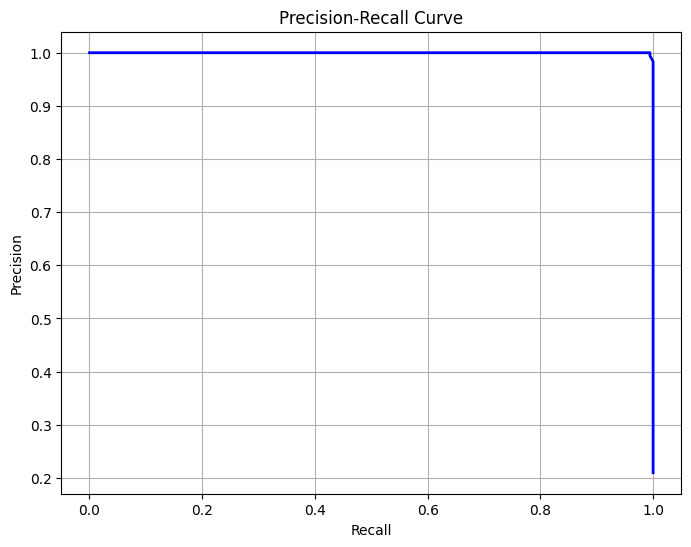

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
